In [1]:
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline
import numpy as np
import random

# Configuration Model Red Práctica 1

Distribución de grado de la Red Nº  46


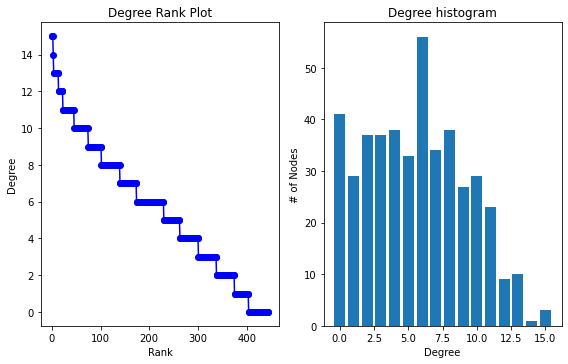

RED 1 
 ---------------------------------------------------------------- 

Número de nodos: 445.0
Número de aristas: 1240.16
Camino mínimo medio: 403.7
Grado medio: 5.57
Radio medio de la red 5.0
Diámetro medio de la red 7.3
Número de componentes conexas:  42
Media del coeficiente de clustering 0.0164
Coeficiente de clustering global 0.01939


In [2]:
# Red conforme a una secuencia de grados
#
# Podemos generar una red con una secuencia de grados dada
# Dicha secuencia puede seguir una determinada distribución, 
# por ejemplo, una uniforme, una normal, una ley de potencias, etc
# Sin embargo, la red resultante puede tener multi-enlaces y 
# auto-enlaces. La presencia de estos decrece si el número de nodos
# es alto con respecto al grado medio de la distribución.



N1=L1=gradomedio1=caminocorto1=radio1=diametro1=clustering1=clusterglobal1=nrcomponentes=0

#Creamos las variables para guardar la media, desviación típica, el valor máximo y el valor mínimo para cada propiedad
mean = [];
dt = [];
vmax = [];
vmin = []; 
# Generamos una secuencia de grados aleatoria que sigue
# una distribución normal de media 15 y desviación típica 2
# Generamos 40 grados (nuestra red tendrá 40 nodos)
valores_aleatorios = np.random.normal(6, 4, 445) 
# Truncamos los valores para tener números enteros
grados_aleatorios = valores_aleatorios.astype(int)
#Variable aleatoria para pintar la distribución de grado de una de las redes
pintar_dist = random.randint(0,50)
for x in range(50):
    #La suma de todos los grados de los nodos de la red debe ser par
        while sum(grados_aleatorios) % 2 != 0:
            valores_aleatorios = np.random.normal(6, 4, 445) 
            
            grados_aleatorios = valores_aleatorios.astype(int)
        
        grafo_redp1 = nx.configuration_model(grados_aleatorios)

        # Potencialmente la red puede tener múltiples enlaces (entre 
        # un mismo par de nodos). Para eliminarlos se hace lo siguiente
        grafo_redp1 = nx.Graph(grafo_redp1)

        # IDEM con los auto-enlaces (self-loops)
        grafo_redp1.remove_edges_from(nx.selfloop_edges(grafo_redp1))
        red1 = grafo_redp1
        grados = [val for (node, val) in red1.degree()]
        mean.append(np.mean(grados))
        dt.append(np.std(grados))
        vmax.append(np.amax(grados))
        vmin.append(np.amin(grados))

        N1 = N1 + red1.number_of_nodes()
        L1 = L1 + red1.number_of_edges()
        gradomedio1 += (2 * red1.number_of_edges())/ red1.number_of_nodes()
        clustering1 += nx.average_clustering(red1)
        clusterglobal1 += nx.transitivity(red1)
        #Componentes conectados de la red para calcular el camino más corto, diámetro y radio de la red
        conectado = nx.connected_components(red1)
        nrcomponentes += nx.number_connected_components(red1)
        maxconectado = max(conectado, key=len) 
        caminocorto1 += len(list(nx.shortest_path(red1.subgraph(maxconectado))))
        radio1 += nx.radius(red1.subgraph(maxconectado))
        diametro1 += nx.diameter(red1.subgraph(maxconectado))
        
        if pintar_dist == x:
            print("Distribución de grado de la Red Nº ", x)
            degree_sequence = sorted((d for n, d in red1.degree()), reverse=True)
            dmax = max(degree_sequence)

            fig = plt.figure("Grado de la red 1", figsize=(8, 8))
            # Create a gridspec for adding subplots of different sizes
            axgrid = fig.add_gridspec(5, 4)

            ax1 = fig.add_subplot(axgrid[2:, :2])
            ax1.plot(degree_sequence, "b-", marker="o")
            ax1.set_title("Degree Rank Plot")
            ax1.set_ylabel("Degree")
            ax1.set_xlabel("Rank")

            ax2 = fig.add_subplot(axgrid[2:, 2:])
            ax2.bar(*np.unique(degree_sequence, return_counts=True))
            ax2.set_title("Degree histogram")
            ax2.set_xlabel("Degree")
            ax2.set_ylabel("# of Nodes")

            fig.tight_layout()
            plt.show()

    
print('RED 1 \n ---------------------------------------------------------------- \n')
print('Número de nodos:', N1/50)
print('Número de aristas:',round(L1/50,2))
print('Camino mínimo medio:',round(caminocorto1/50,1))
print('Grado medio:',round(gradomedio1/50,2))
print('Radio medio de la red', round(radio1/50,1))
print('Diámetro medio de la red', round(diametro1/50,1))
print('Número de componentes conexas: ', round(nrcomponentes/50))
print('Media del coeficiente de clustering', round(clustering1/50,5))
print('Coeficiente de clustering global', round(clusterglobal1/50,5))



# NOTA: Tanto al truncar/redondear los números de la normal, como al
# eliminar auto-enlaces y multi-enlaces alteramos ligeramente la secuencia
# pudiendo hacer que no se pueda ajustar a ella la distribución de origen 

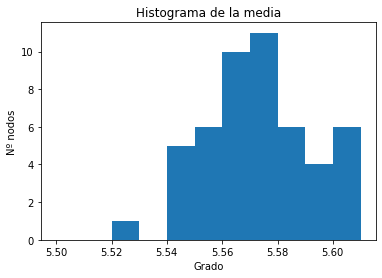

In [3]:
#Histograma de la media de las 50 redes
step = 0.01
bins = np.arange(5.5,5.61, step)
media = np.round(mean,2);
hist, edges = np.histogram(media,bins=bins)
plt.hist(mean,bins)
plt.title("Histograma de la media")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()

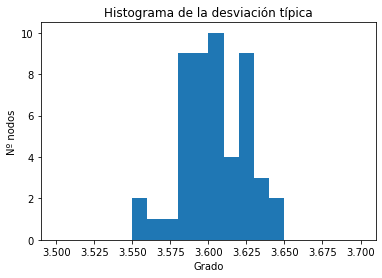

In [50]:
#Histograma de la desviación típica de las 50 redes
step = 0.01
bins = np.arange(3.5,3.7, step)
desviacion = np.round(dt,2);
hist, edges = np.histogram(desviacion,bins=bins)
plt.hist(dt,bins)
plt.title("Histograma de la desviación típica")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()

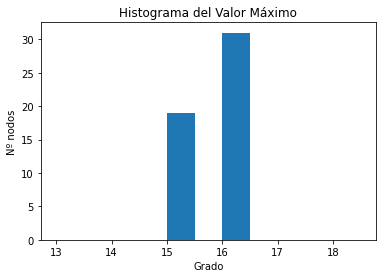

In [44]:
#Histograma del valor máximo de las 50 redes
step = 0.5
bins = np.arange(13,19, step)
maximo = np.round(vmax,2);
hist, edges = np.histogram(maximo,bins=bins)
plt.hist(vmax,bins)
plt.title("Histograma del Valor Máximo")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()

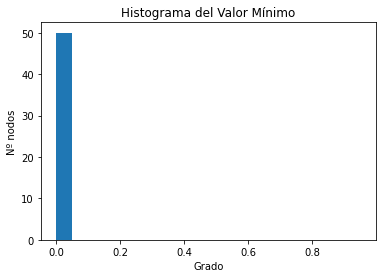

In [57]:
#Histograma del valor mínimo de las 50 redes
step = 0.05
bins = np.arange(0,1, step)
minimo = np.round(vmin,2);
hist, edges = np.histogram(minimo,bins=bins)
plt.hist(vmin,bins)
plt.title("Histograma del Valor Mínimo")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()

# Comparación con el Modelo Erdos Renyi 

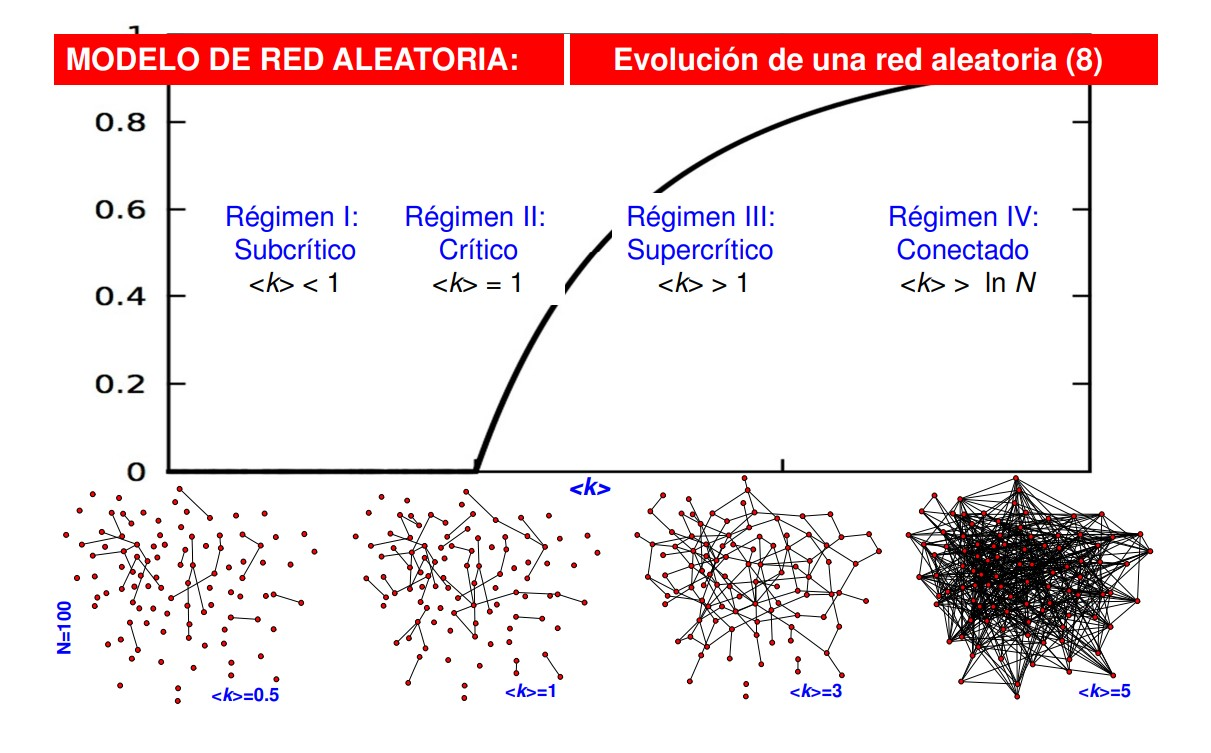

### La comparación la haremos tomando la probabilidad como parámetro de distintas regiones de la evolucion de la red aleatoria. En esta ocasión tomaremos el regimen supercrítico y conectado ya que son los casos que más se asemejan a la red de la práctica 1, osea k>1 y k>lnN. Para la primera red ln(1499) = 7,313.Para la segunda red ln(444) = 6,096. Tomaremos k=ln(N)/2 para el régimen supercrítico y k=ln(N)+1. 

## Comparación con p supercrítica

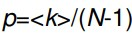

In [7]:
#<k> = ln(N)/2 
#p = <k>/(N-1)

#MODELAMOS LA PRIMERA RED

Distribución de grado de la Red1 Nº  17


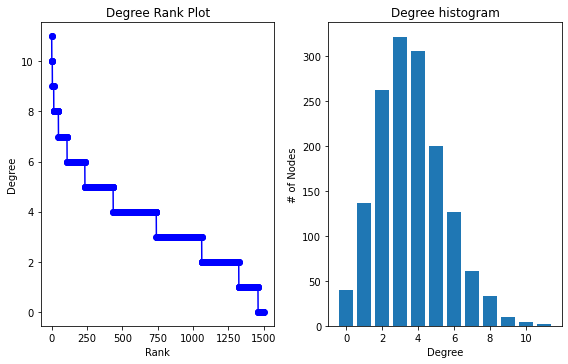

RED 1 
 ---------------------------------------------------------------- 

Número de nodos: 1500.0
Número de aristas: 2742.68
Camino mínimo medio: 1457.6
Grado medio: 3.66
Radio medio de la red 7.9
Diámetro medio de la red 12.3
Número de componentes conexas:  41
Media del coeficiente de clustering 0.00209
Coeficiente de clustering global 0.00237


In [17]:
k1 = np.log(1500)/2 
p1 = k1/1499 

#Variable aleatoria para pintar la distribución de grado de una de las redes
pintar_dist = random.randint(0,50)

# Modelamos las redes con el modelo Erdos Renyi. Una con 1500 nodos de parámetro y la otra con 445
N1=L1=gradomedio1=caminocorto1=radio1=diametro1=clustering1=clusterglobal1=nrcomponentes=0

#Creamos las variables para guardar la media, desviación típica, el valor máximo y el valor mínimo para cada propiedad
meaner1 = [];
dter1 = [];
vmaxer1 = [];
vminer1 = []; 

#Variable con el número de nodos deseado para cada red
nodos1=1500
for x in range(50):
    red1 = nx.erdos_renyi_graph(nodos1, p1)
    
    grados = [val for (node, val) in red1.degree()]
    meaner1.append(np.mean(grados))
    dter1.append(np.std(grados))
    vmaxer1.append(np.amax(grados))
    vminer1.append(np.amin(grados))
        
    N1 = N1 + red1.number_of_nodes()
    L1 = L1 + red1.number_of_edges()
    gradomedio1 += 2 * red1.number_of_edges() / red1.number_of_nodes()
    clustering1 += nx.average_clustering(red1)
    clusterglobal1 += nx.transitivity(red1)
    #Componentes conectados de la red para calcular el camino más corto, diámetro y radio de la red
    conectado1 = nx.connected_components(red1)
    nrcomponentes += nx.number_connected_components(red1)
    maxconectado1 = max(conectado1, key=len) 
    caminocorto1 += len(list(nx.shortest_path(red1.subgraph(maxconectado1))))
    radio1 += nx.radius(red1.subgraph(maxconectado1))
    diametro1 += nx.diameter(red1.subgraph(maxconectado1))
    
    if pintar_dist == x:
            print("Distribución de grado de la Red1 Nº ", x)
            degree_sequence1 = sorted((d for n, d in red1.degree()), reverse=True)
            dmax1 = max(degree_sequence1)

            fig1 = plt.figure("Grado de la red 1", figsize=(8, 8))
            # Create a gridspec for adding subplots of different sizes
            axgrid = fig1.add_gridspec(5, 4)

            ax1 = fig1.add_subplot(axgrid[2:, :2])
            ax1.plot(degree_sequence1, "b-", marker="o")
            ax1.set_title("Degree Rank Plot")
            ax1.set_ylabel("Degree")
            ax1.set_xlabel("Rank")

            ax2 = fig1.add_subplot(axgrid[2:, 2:])
            ax2.bar(*np.unique(degree_sequence1, return_counts=True))
            ax2.set_title("Degree histogram")
            ax2.set_xlabel("Degree")
            ax2.set_ylabel("# of Nodes")

            fig1.tight_layout()
            plt.show()
            
print('RED 1 \n ---------------------------------------------------------------- \n')
print('Número de nodos:', N1/50)
print('Número de aristas:',round(L1/50,2))
print('Camino mínimo medio:',round(caminocorto1/50,1))
print('Grado medio:',round(gradomedio1/50,2))
print('Radio medio de la red', round(radio1/50,1))
print('Diámetro medio de la red', round(diametro1/50,1))
print('Número de componentes conexas: ', round(nrcomponentes/50))
print('Media del coeficiente de clustering', round(clustering1/50,5))
print('Coeficiente de clustering global', round(clusterglobal1/50,5))




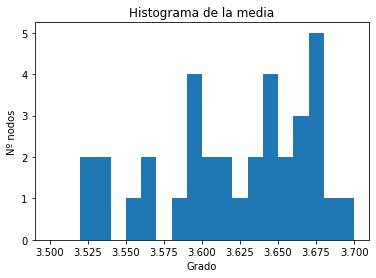

In [62]:
#Histograma de la media de las 50 redes
step = 0.01
bins = np.arange(3.5,3.71, step)
media = np.round(meaner1,2);
hist, edges = np.histogram(media,bins=bins)
plt.hist(meaner1,bins)
plt.title("Histograma de la media")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()


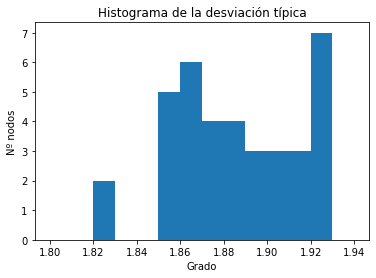

In [70]:
#Histograma de la desviación típica de las 50 redes
step = 0.01
bins = np.arange(1.8,1.95, step)
desviacion = np.round(dter1,2);
hist, edges = np.histogram(desviacion,bins=bins)
plt.hist(dter1,bins)
plt.title("Histograma de la desviación típica")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()

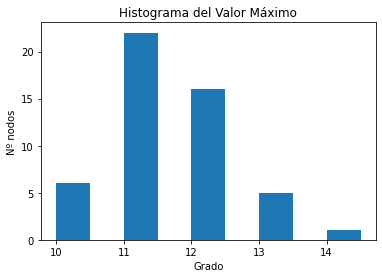

In [69]:
#Histograma del valor máximo de las 50 redes
step = 0.5
bins = np.arange(10,15, step)
maximo = np.round(vmaxer1,2);
hist, edges = np.histogram(maximo,bins=bins)
plt.hist(vmaxer1,bins)
plt.title("Histograma del Valor Máximo")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()

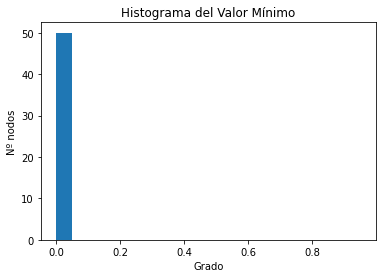

In [71]:
#Histograma del valor mínimo de las 50 redes
step = 0.05
bins = np.arange(0,1, step)
minimo = np.round(vminer1,2);
hist, edges = np.histogram(minimo,bins=bins)
plt.hist(vminer1,bins)
plt.title("Histograma del Valor Mínimo")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()

Distribución de grado de la Red2 Nº  26


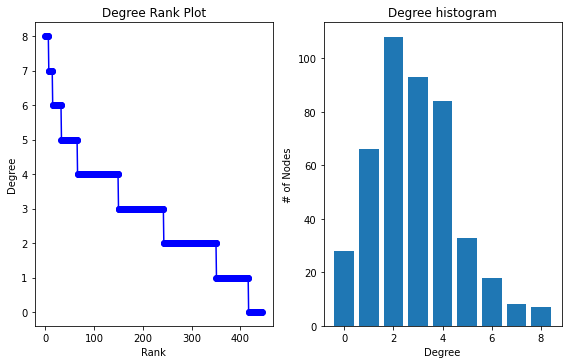

RED 2 
 ---------------------------------------------------------------- 

Número de nodos: 445.0
Número de aristas: 679.64
Camino mínimo medio: 420.7
Grado medio: 3.05
Radio medio de la red 7.2
Diámetro medio de la red 12.4
Número de componentes conexas:  39
Media del coeficiente de clustering 0.00532
Coeficiente de clustering global 0.00684


In [18]:
#MODELAMOS LA SEGUNDA RED
k2 = np.log(445)/2 
p2 = k2/444

#Variable aleatoria para pintar la distribución de grado de una de las redes
pintar_dist = random.randint(0,50)
# Modelamos las redes con el modelo Erdos Renyi. Una con 1500 nodos de parámetro y la otra con 445
N2=L2=gradomedio2=caminocorto2=radio2=diametro2=clustering2=clusterglobal2=nrcomponentes=0
#Creamos las variables para guardar la media, desviación típica, el valor máximo y el valor mínimo para cada propiedad
meaner2 = [];
dter2 = [];
vmaxer2 = [];
vminer2 = []; 
#Variable con el número de nodos deseado para cada red

nodos2=445
for x in range(50):
    red2 = nx.erdos_renyi_graph(nodos2, p2)
    
    grados = [val for (node, val) in red2.degree()]
    meaner2.append(np.mean(grados))
    dter2.append(np.std(grados))
    vmaxer2.append(np.amax(grados))
    vminer2.append(np.amin(grados))
    
    N2 = N2 + red2.number_of_nodes()
    L2 = L2 + red2.number_of_edges()
    gradomedio2 += 2 * red2.number_of_edges() / red2.number_of_nodes()
    clustering2 += nx.average_clustering(red2)
    clusterglobal2 += nx.transitivity(red2)
    
    #Componentes conectados de la red para calcular el camino más corto, diámetro y radio de la red
    conectado2 = nx.connected_components(red2)
    nrcomponentes += nx.number_connected_components(red2)
    maxconectado2 = max(conectado2, key=len) 
    caminocorto2 += len(list(nx.shortest_path(red2.subgraph(maxconectado2))))
    radio2 += nx.radius(red2.subgraph(maxconectado2))
    diametro2 += nx.diameter(red2.subgraph(maxconectado2))
    
    if pintar_dist == x:
            print("Distribución de grado de la Red2 Nº ", x)
            degree_sequence2 = sorted((d for n, d in red2.degree()), reverse=True)
            dmax2 = max(degree_sequence2)

            fig2 = plt.figure("Grado de la red 2", figsize=(8, 8))
            # Create a gridspec for adding subplots of different sizes
            axgrid = fig2.add_gridspec(5, 4)

            ax1 = fig2.add_subplot(axgrid[2:, :2])
            ax1.plot(degree_sequence2, "b-", marker="o")
            ax1.set_title("Degree Rank Plot")
            ax1.set_ylabel("Degree")
            ax1.set_xlabel("Rank")

            ax2 = fig2.add_subplot(axgrid[2:, 2:])
            ax2.bar(*np.unique(degree_sequence2, return_counts=True))
            ax2.set_title("Degree histogram")
            ax2.set_xlabel("Degree")
            ax2.set_ylabel("# of Nodes")

            fig2.tight_layout()
            plt.show()

print('RED 2 \n ---------------------------------------------------------------- \n')
print('Número de nodos:', N2/50)
print('Número de aristas:',round(L2/50,2))
print('Camino mínimo medio:',round(caminocorto2/50,1))
print('Grado medio:',round(gradomedio2/50,2))
print('Radio medio de la red', round(radio2/50,1))
print('Diámetro medio de la red', round(diametro2/50,1))
print('Número de componentes conexas: ', round(nrcomponentes/50))
print('Media del coeficiente de clustering', round(clustering2/50,5))
print('Coeficiente de clustering global', round(clusterglobal2/50,5))

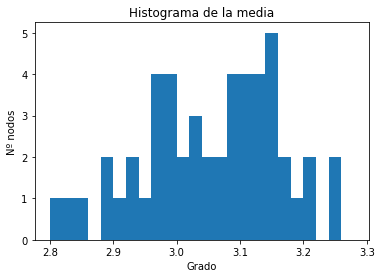

In [77]:
#Histograma de la media de las 50 redes
step = 0.02
bins = np.arange(2.8,3.3, step)
media = np.round(meaner2,2);
hist, edges = np.histogram(media,bins=bins)
plt.hist(meaner2,bins)
plt.title("Histograma de la media")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()

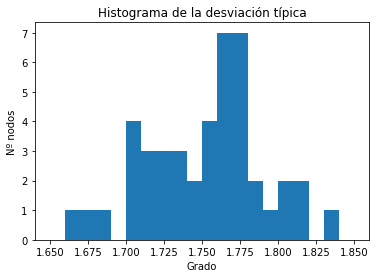

In [80]:
#Histograma de la desviación típica de las 50 redes
step = 0.01
bins = np.arange(1.65,1.85, step)
desviacion = np.round(dter2,2);
hist, edges = np.histogram(desviacion,bins=bins)
plt.hist(dter2,bins)
plt.title("Histograma de la desviación típica")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()


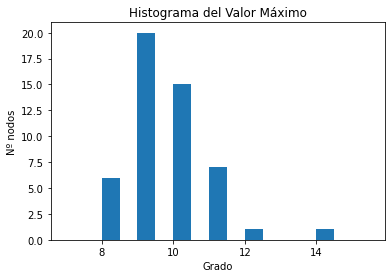

In [85]:
#Histograma del valor máximo de las 50 redes
step = 0.5
bins = np.arange(7,16, step)
maximo = np.round(vmaxer2,2);
hist, edges = np.histogram(maximo,bins=bins)
plt.hist(vmaxer2,bins)
plt.title("Histograma del Valor Máximo")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()

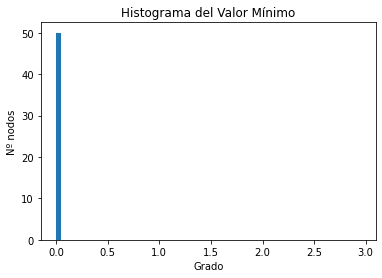

In [105]:
#Histograma del valor mínimo de las 50 redes
step = 0.05
bins = np.arange(0,3, step)
minimo = np.round(vminer2,2);
hist, edges = np.histogram(minimo,bins=bins)
plt.hist(vminer2,bins)
plt.title("Histograma del Valor Mínimo")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()

## Comparación con p etapa conectado

In [10]:
#<k> = ln(N)+1
#p = <k>/(N-1)

#MODELAMOS LA PRIMERA RED

Distribución de grado de la Red1 Nº  28


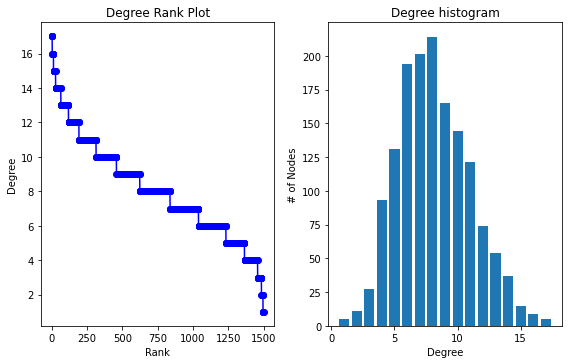

RED 1 
 ---------------------------------------------------------------- 

Número de nodos: 1500.0
Número de aristas: 6227.94
Camino mínimo medio: 1499.7
Grado medio: 8.3
Radio medio de la red 5.0
Diámetro medio de la red 6.5
Número de componentes conexas:  1
Media del coeficiente de clustering 0.00544
Coeficiente de clustering global 0.00548


In [13]:
k1 = np.log(1500)+1
p1 = k1/1499 

#Variable aleatoria para pintar la distribución de grado de una de las redes
pintar_dist = random.randint(0,50)
# Modelamos las redes con el modelo Erdos Renyi. Una con 1500 nodos de parámetro y la otra con 445
N1=L1=gradomedio1=caminocorto1=radio1=diametro1=clustering1=clusterglobal1=nrcomponentes=0
#Creamos las variables para guardar la media, desviación típica, el valor máximo y el valor mínimo para cada propiedad
meaner3 = [];
dter3 = [];
vmaxer3 = [];
vminer3 = []; 
#Variable con el número de nodos deseado para cada red
nodos1=1500
for x in range(50):
    red1 = nx.erdos_renyi_graph(nodos1, p1)
    
    grados = [val for (node, val) in red1.degree()]
    meaner3.append(np.mean(grados))
    dter3.append(np.std(grados))
    vmaxer3.append(np.amax(grados))
    vminer3.append(np.amin(grados))
    
    N1 = N1 + red1.number_of_nodes()
    L1 = L1 + red1.number_of_edges()
    gradomedio1 += 2 *  red1.number_of_edges()/ red1.number_of_nodes()
    clustering1 += nx.average_clustering(red1)
    clusterglobal1 += nx.transitivity(red1)
    #Componentes conectados de la red para calcular el camino más corto, diámetro y radio de la red
    conectado1 = nx.connected_components(red1)
    nrcomponentes += nx.number_connected_components(red1)
    maxconectado1 = max(conectado1, key=len) 
    caminocorto1 += len(list(nx.shortest_path(red1.subgraph(maxconectado1))))
    radio1 += nx.radius(red1.subgraph(maxconectado1))
    diametro1 += nx.diameter(red1.subgraph(maxconectado1))
    
    if pintar_dist == x:
            print("Distribución de grado de la Red1 Nº ", x)
            degree_sequence1 = sorted((d for n, d in red1.degree()), reverse=True)
            dmax1 = max(degree_sequence1)

            fig1 = plt.figure("Grado de la red 1", figsize=(8, 8))
            # Create a gridspec for adding subplots of different sizes
            axgrid = fig1.add_gridspec(5, 4)

            ax1 = fig1.add_subplot(axgrid[2:, :2])
            ax1.plot(degree_sequence1, "b-", marker="o")
            ax1.set_title("Degree Rank Plot")
            ax1.set_ylabel("Degree")
            ax1.set_xlabel("Rank")

            ax2 = fig1.add_subplot(axgrid[2:, 2:])
            ax2.bar(*np.unique(degree_sequence1, return_counts=True))
            ax2.set_title("Degree histogram")
            ax2.set_xlabel("Degree")
            ax2.set_ylabel("# of Nodes")

            fig1.tight_layout()
            plt.show()
            
print('RED 1 \n ---------------------------------------------------------------- \n')
print('Número de nodos:', N1/50)
print('Número de aristas:',round(L1/50,2))
print('Camino mínimo medio:',round(caminocorto1/50,1))
print('Grado medio:',round(gradomedio1/50,2))
print('Radio medio de la red', round(radio1/50,1))
print('Diámetro medio de la red', round(diametro1/50,1))
print('Número de componentes conexas: ', round(nrcomponentes/50))
print('Media del coeficiente de clustering', round(clustering1/50,5))
print('Coeficiente de clustering global', round(clusterglobal1/50,5))



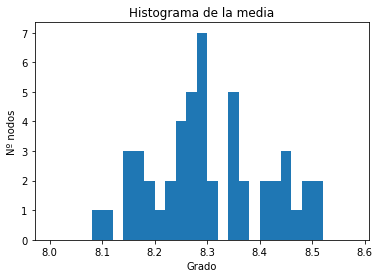

In [89]:
#Histograma de la media de las 50 redes
step = 0.02
bins = np.arange(8,8.6, step)
media = np.round(meaner3,2);
hist, edges = np.histogram(media,bins=bins)
plt.hist(meaner3,bins)
plt.title("Histograma de la media")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()

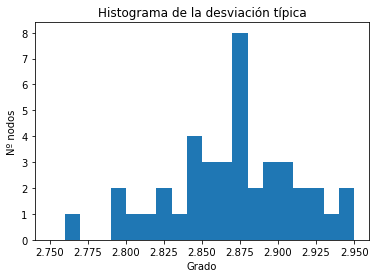

In [96]:
#Histograma de la desviación típica de las 50 redes
step = 0.01
bins = np.arange(2.75,2.95, step)
desviacion = np.round(dter3,2);
hist, edges = np.histogram(desviacion,bins=bins)
plt.hist(dter3,bins)
plt.title("Histograma de la desviación típica")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()


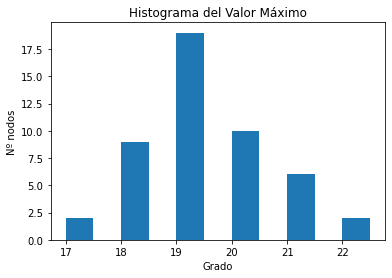

In [99]:
#Histograma del valor máximo de las 50 redes
step = 0.5
bins = np.arange(17,23, step)
maximo = np.round(vmaxer3,2);
hist, edges = np.histogram(maximo,bins=bins)
plt.hist(vmaxer3,bins)
plt.title("Histograma del Valor Máximo")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()

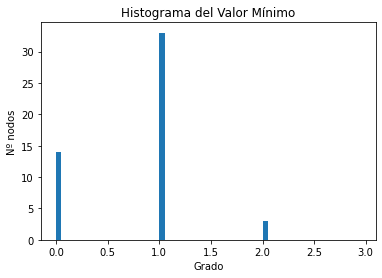

In [103]:
#Histograma del valor mínimo de las 50 redes
step = 0.05
bins = np.arange(0,3, step)
minimo = np.round(vminer3,2);
hist, edges = np.histogram(minimo,bins=bins)
plt.hist(vminer3,bins)
plt.title("Histograma del Valor Mínimo")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()

Distribución de grado de la Red2 Nº  39


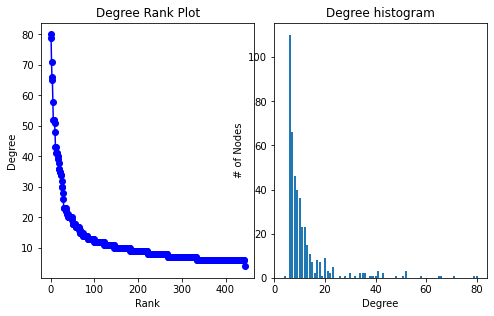

RED 2 
 ---------------------------------------------------------------- 

Número de nodos: 445.0
Número de aristas: 2634.0
Camino mínimo medio: 445.0
Grado medio: 11.84
Radio medio de la red 3.0
Diámetro medio de la red 4.0
Número de componentes conexas:  1
Media del coeficiente de clustering 0.07945
Coeficiente de clustering global 0.0632


In [21]:
#MODELAMOS LA SEGUNDA RED
k2 = np.log(445)+1
p2 = k2/444

#Variable aleatoria para pintar la distribución de grado de una de las redes
pintar_dist = random.randint(0,50)

# Modelamos las redes con el modelo Erdos Renyi. Una con 1500 nodos de parámetro y la otra con 445
N2=L2=gradomedio2=caminocorto2=radio2=diametro2=clustering2=clusterglobal2=nrcomponentes=0
#Creamos las variables para guardar la media, desviación típica, el valor máximo y el valor mínimo para cada propiedad
meaner4 = [];
dter4 = [];
vmaxer4 = [];
vminer4 = []; 
#Variable con el número de nodos deseado para cada red

nodos2=445
m=6
for x in range(50):
    red1 = nx.erdos_renyi_graph(nodos2, p2)
    
    grados = [val for (node, val) in red2.degree()]
    meaner4.append(np.mean(grados))
    dter4.append(np.std(grados))
    vmaxer4.append(np.amax(grados))
    vminer4.append(np.amin(grados))
    
    N2 = N2 + red2.number_of_nodes()
    L2 = L2 + red2.number_of_edges()
    gradomedio2 += 2 * red2.number_of_edges() / red2.number_of_nodes()
    clustering2 += nx.average_clustering(red2)
    clusterglobal2 += nx.transitivity(red2)
    
    #Componentes conectados de la red para calcular el camino más corto, diámetro y radio de la red
    conectado2 = nx.connected_components(red2)
    nrcomponentes += nx.number_connected_components(red2)
    maxconectado2 = max(conectado2, key=len) 
    caminocorto2 += len(list(nx.shortest_path(red2.subgraph(maxconectado2))))
    radio2 += nx.radius(red2.subgraph(maxconectado2))
    diametro2 += nx.diameter(red2.subgraph(maxconectado2))
    
    if pintar_dist == x:
            print("Distribución de grado de la Red2 Nº ", x)
            degree_sequence2 = sorted((d for n, d in red2.degree()), reverse=True)
            dmax2 = max(degree_sequence2)

            fig2 = plt.figure("Grado de la red 2", figsize=(8, 8))
            # Create a gridspec for adding subplots of different sizes
            axgrid = fig2.add_gridspec(5, 4)

            ax1 = fig2.add_subplot(axgrid[2:, :2])
            ax1.plot(degree_sequence2, "b-", marker="o")
            ax1.set_title("Degree Rank Plot")
            ax1.set_ylabel("Degree")
            ax1.set_xlabel("Rank")

            ax2 = fig2.add_subplot(axgrid[2:, 2:])
            ax2.bar(*np.unique(degree_sequence2, return_counts=True))
            ax2.set_title("Degree histogram")
            ax2.set_xlabel("Degree")
            ax2.set_ylabel("# of Nodes")

            fig.tight_layout()
            plt.show()

print('RED 2 \n ---------------------------------------------------------------- \n')
print('Número de nodos:', N2/50)
print('Número de aristas:',round(L2/50,2))
print('Camino mínimo medio:',round(caminocorto2/50,1))
print('Grado medio:',round(gradomedio2/50,2))
print('Radio medio de la red', round(radio2/50,1))
print('Diámetro medio de la red', round(diametro2/50,1))
print('Número de componentes conexas: ', round(nrcomponentes/50))
print('Media del coeficiente de clustering', round(clustering2/50,5))
print('Coeficiente de clustering global', round(clusterglobal2/50,5))

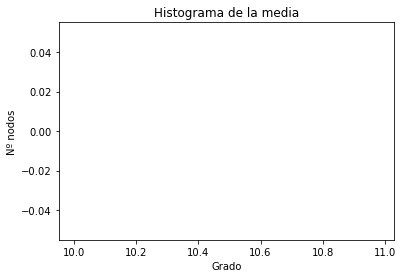

In [111]:
#Histograma de la media de las 50 redes
step = 0.02
bins = np.arange(10,11, step)
media = np.round(meaner4,2);
hist, edges = np.histogram(media,bins=bins)
plt.hist(meaner4,bins)
plt.title("Histograma de la media")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()

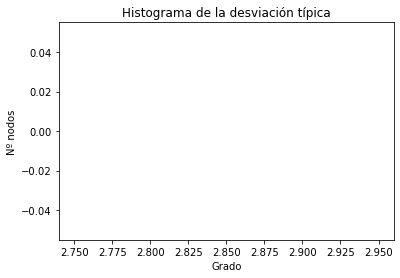

[10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130664916,
 10.447122130

In [112]:
#Histograma de la desviación típica de las 50 redes
step = 0.01
bins = np.arange(2.75,2.95, step)
desviacion = np.round(dter4,2);
hist, edges = np.histogram(desviacion,bins=bins)
plt.hist(dter4,bins)
plt.title("Histograma de la desviación típica")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()
dter4

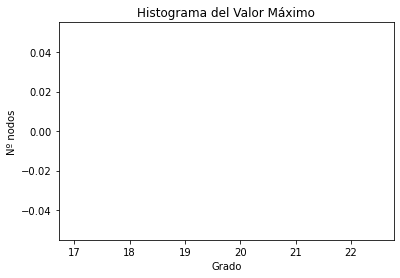

[80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80]

In [114]:
#Histograma del valor máximo de las 50 redes
step = 0.5
bins = np.arange(17,23, step)
maximo = np.round(vmaxer4,2);
hist, edges = np.histogram(maximo,bins=bins)
plt.hist(vmaxer4,bins)
plt.title("Histograma del Valor Máximo")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()
vmaxer4

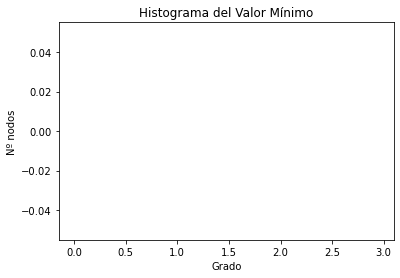

[4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

In [115]:
#Histograma del valor mínimo de las 50 redes
step = 0.05
bins = np.arange(0,3, step)
minimo = np.round(vminer4,2);
hist, edges = np.histogram(minimo,bins=bins)
plt.hist(vminer4,bins)
plt.title("Histograma del Valor Mínimo")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()

# Comparación con el Modelo Barabasi-Albert

Distribución de grado de la Red1 Nº  42


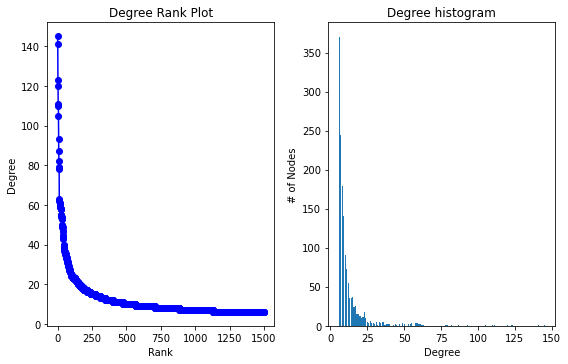

RED 1 
 ---------------------------------------------------------------- 

Número de nodos: 1500.0
Número de aristas: 8964.0
Camino mínimo medio: 1500.0
Grado medio: 11.95
Radio medio de la red 3.0
Diámetro medio de la red 5.0
Número de componentes conexas:  1
Media del coeficiente de clustering 0.03319
Coeficiente de clustering global 0.02634


In [15]:

#Variable aleatoria para pintar la distribución de grado de una de las redes
pintar_dist = random.randint(0,50)
#Modelamos las redes con el modelo Erdos Renyi. Una con 1500 nodos de parámetro y la otra con 445
N1=L1=gradomedio1=caminocorto1=radio1=diametro1=clustering1=clusterglobal1=nrcomponentes=0
#Creamos las variables para guardar la media, desviación típica, el valor máximo y el valor mínimo para cada propiedad
meanba1 = [];
dtba1 = [];
vmaxba1 = [];
vminba1 = []; 
#Variable con el número de nodos deseado para cada red
nodos1=1500
m=6            #grado medio
for x in range(50):
    red1 = nx.barabasi_albert_graph(nodos1,m)
    
    grados = [val for (node, val) in red1.degree()]
    meanba1.append(np.mean(grados))
    dtba1.append(np.std(grados))
    vmaxba1.append(np.amax(grados))
    vminba1.append(np.amin(grados))
    
    N1 = N1 + red1.number_of_nodes()
    L1 = L1 + red1.number_of_edges()
    gradomedio1 += 2 *  red1.number_of_edges()/ red1.number_of_nodes()
    clustering1 += nx.average_clustering(red1)
    clusterglobal1 += nx.transitivity(red1)
    #Componentes conectados de la red para calcular el camino más corto, diámetro y radio de la red
    conectado1 = nx.connected_components(red1)
    nrcomponentes += nx.number_connected_components(red1)
    maxconectado1 = max(conectado1, key=len) 
    caminocorto1 += len(list(nx.shortest_path(red1.subgraph(maxconectado1))))
    radio1 += nx.radius(red1.subgraph(maxconectado1))
    diametro1 += nx.diameter(red1.subgraph(maxconectado1))
    
    if pintar_dist == x:
            print("Distribución de grado de la Red1 Nº ", x)
            degree_sequence1 = sorted((d for n, d in red1.degree()), reverse=True)
            dmax1 = max(degree_sequence1)

            fig1 = plt.figure("Grado de la red 1", figsize=(8, 8))
            # Create a gridspec for adding subplots of different sizes
            axgrid = fig1.add_gridspec(5, 4)

            ax1 = fig1.add_subplot(axgrid[2:, :2])
            ax1.plot(degree_sequence1, "b-", marker="o")
            ax1.set_title("Degree Rank Plot")
            ax1.set_ylabel("Degree")
            ax1.set_xlabel("Rank")

            ax2 = fig1.add_subplot(axgrid[2:, 2:])
            ax2.bar(*np.unique(degree_sequence1, return_counts=True))
            ax2.set_title("Degree histogram")
            ax2.set_xlabel("Degree")
            ax2.set_ylabel("# of Nodes")

            fig1.tight_layout()
            plt.show()
            
print('RED 1 \n ---------------------------------------------------------------- \n')
print('Número de nodos:', N1/50)
print('Número de aristas:',round(L1/50,2))
print('Camino mínimo medio:',round(caminocorto1/50,1))
print('Grado medio:',round(gradomedio1/50,2))
print('Radio medio de la red', round(radio1/50,1))
print('Diámetro medio de la red', round(diametro1/50,1))
print('Número de componentes conexas: ', round(nrcomponentes/50))
print('Media del coeficiente de clustering', round(clustering1/50,5))
print('Coeficiente de clustering global', round(clusterglobal1/50,5))


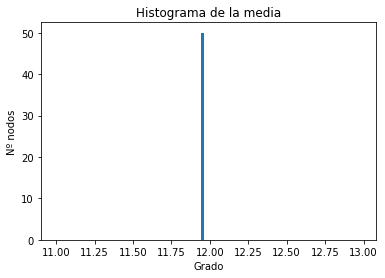

[11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952,
 11.952]

In [121]:
#Histograma de la media de las 50 redes
step = 0.02
bins = np.arange(11,13, step)
media = np.round(meanba1,2);
hist, edges = np.histogram(media,bins=bins)
plt.hist(meanba1,bins)
plt.title("Histograma de la media")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()
meanba1

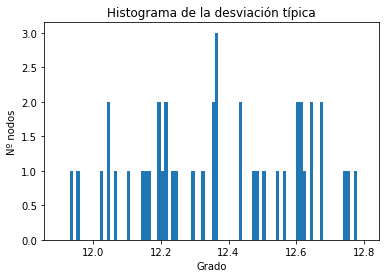

In [125]:
#Histograma de la desviación típica de las 50 redes
step = 0.01
bins = np.arange(11.9,12.8, step)
desviacion = np.round(dtba1,2);
hist, edges = np.histogram(desviacion,bins=bins)
plt.hist(dtba1,bins)
plt.title("Histograma de la desviación típica")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()

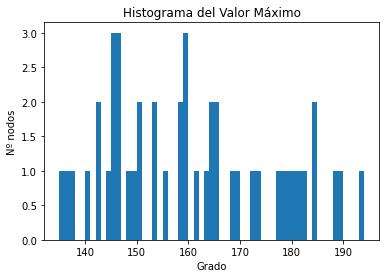

[165,
 180,
 153,
 208,
 165,
 146,
 159,
 178,
 184,
 188,
 172,
 134,
 150,
 145,
 144,
 220,
 169,
 153,
 135,
 137,
 159,
 184,
 163,
 140,
 146,
 155,
 179,
 181,
 150,
 168,
 164,
 161,
 182,
 149,
 158,
 148,
 173,
 189,
 177,
 159,
 164,
 145,
 145,
 142,
 193,
 158,
 202,
 142,
 146,
 136]

In [132]:
#Histograma del valor máximo de las 50 redes
step = 1
bins = np.arange(135,195, step)
maximo = np.round(vmaxba1,2);
hist, edges = np.histogram(maximo,bins=bins)
plt.hist(vmaxba1,bins)
plt.title("Histograma del Valor Máximo")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()
vmaxba1

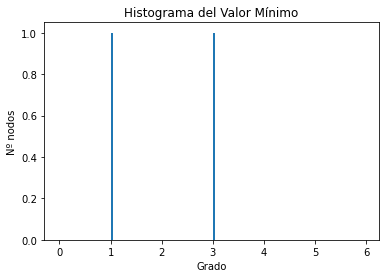

In [117]:
#Histograma del valor mínimo de las 50 redes
step = 0.05
bins = np.arange(0,6, step)
minimo = np.round(vminba1,2);
hist, edges = np.histogram(minimo,bins=bins)
plt.hist(vminba1,bins)
plt.title("Histograma del Valor Mínimo")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()

Distribución de grado de la Red2 Nº  35


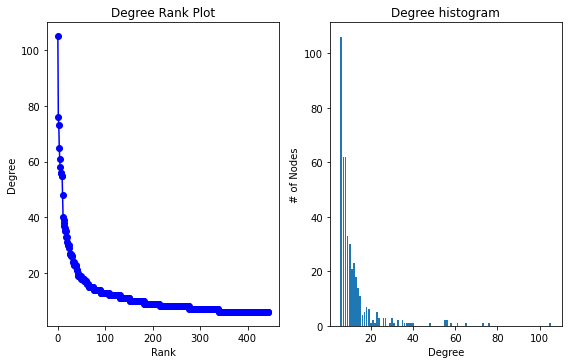

RED 2 
 ---------------------------------------------------------------- 

Número de nodos: 445.0
Número de aristas: 2634.0
Camino mínimo medio: 445.0
Grado medio: 11.84
Radio medio de la red 3.0
Diámetro medio de la red 4.0
Número de componentes conexas:  39
Media del coeficiente de clustering 0.07922
Coeficiente de clustering global 0.06421


In [19]:
#MODELAMOS LA SEGUNDA RED

#Variable aleatoria para pintar la distribución de grado de una de las redes
pintar_dist = random.randint(0,50)
# Modelamos las redes con el modelo Erdos Renyi. Una con 1500 nodos de parámetro y la otra con 445
N2=L2=gradomedio2=caminocorto2=radio2=diametro2=clustering2=clusterglobal2=nrcomponentes=0
#Creamos las variables para guardar la media, desviación típica, el valor máximo y el valor mínimo para cada propiedad
meanba2 = [];
dtba2 = [];
vmaxba2 = [];
vminba2 = []; 
#Variable con el número de nodos deseado para cada red

nodos2=445
m=6
for x in range(50):
    red2 = nx.barabasi_albert_graph(nodos2,m)
    
    grados = [val for (node, val) in red2.degree()]
    meanba2.append(np.mean(grados))
    dtba2.append(np.std(grados))
    vmaxba2.append(np.amax(grados))
    vminba2.append(np.amin(grados))
    
    N2 = N2 + red2.number_of_nodes()
    L2 = L2 + red2.number_of_edges()
    gradomedio2 += 2 * red2.number_of_edges() / red2.number_of_nodes()
    clustering2 += nx.average_clustering(red2)
    clusterglobal2 += nx.transitivity(red2)
    
    #Componentes conectados de la red para calcular el camino más corto, diámetro y radio de la red
    conectado2 = nx.connected_components(red2)
    nrcomponentes += nx.number_connected_components(red1)
    maxconectado2 = max(conectado2, key=len) 
    caminocorto2 += len(list(nx.shortest_path(red2.subgraph(maxconectado2))))
    radio2 += nx.radius(red2.subgraph(maxconectado2))
    diametro2 += nx.diameter(red2.subgraph(maxconectado2))
    
    if pintar_dist == x:
            print("Distribución de grado de la Red2 Nº ", x)
            degree_sequence2 = sorted((d for n, d in red2.degree()), reverse=True)
            dmax2 = max(degree_sequence2)

            fig2 = plt.figure("Grado de la red 2", figsize=(8, 8))
            # Create a gridspec for adding subplots of different sizes
            axgrid = fig2.add_gridspec(5, 4)

            ax1 = fig2.add_subplot(axgrid[2:, :2])
            ax1.plot(degree_sequence2, "b-", marker="o")
            ax1.set_title("Degree Rank Plot")
            ax1.set_ylabel("Degree")
            ax1.set_xlabel("Rank")

            ax2 = fig2.add_subplot(axgrid[2:, 2:])
            ax2.bar(*np.unique(degree_sequence2, return_counts=True))
            ax2.set_title("Degree histogram")
            ax2.set_xlabel("Degree")
            ax2.set_ylabel("# of Nodes")

            fig2.tight_layout()
            plt.show()

print('RED 2 \n ---------------------------------------------------------------- \n')
print('Número de nodos:', N2/50)
print('Número de aristas:', round(L2/50,2))
print('Camino mínimo medio:', round(caminocorto2/50,1))
print('Grado medio:', round(gradomedio2/50,2))
print('Radio medio de la red', round(radio2/50,1))
print('Diámetro medio de la red', round(diametro2/50,1))
print('Número de componentes conexas: ', round(nrcomponentes/50))
print('Media del coeficiente de clustering', round(clustering2/50,5))
print('Coeficiente de clustering global', round(clusterglobal2/50,5))

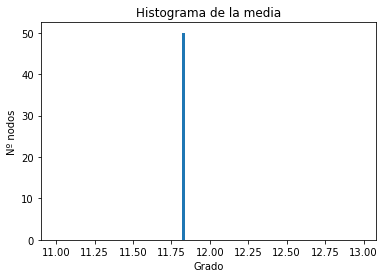

[11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247191012,
 11.838202247

In [134]:
#Histograma de la media de las 50 redes
step = 0.02
bins = np.arange(11,13, step)
media = np.round(meanba2,2);
hist, edges = np.histogram(media,bins=bins)
plt.hist(meanba2,bins)
plt.title("Histograma de la media")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()
meanba2

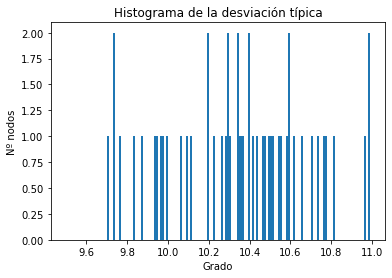

In [140]:
#Histograma de la desviación típica de las 50 redes
step = 0.01
bins = np.arange(9.5,11, step)
desviacion = np.round(dtba2,2);
hist, edges = np.histogram(desviacion,bins=bins)
plt.hist(dtba2,bins)
plt.title("Histograma de la desviación típica")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()

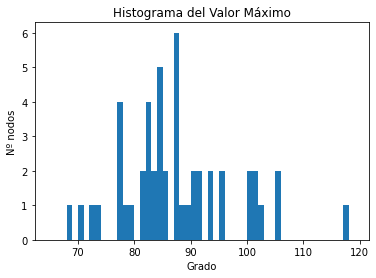

[165,
 180,
 153,
 208,
 165,
 146,
 159,
 178,
 184,
 188,
 172,
 134,
 150,
 145,
 144,
 220,
 169,
 153,
 135,
 137,
 159,
 184,
 163,
 140,
 146,
 155,
 179,
 181,
 150,
 168,
 164,
 161,
 182,
 149,
 158,
 148,
 173,
 189,
 177,
 159,
 164,
 145,
 145,
 142,
 193,
 158,
 202,
 142,
 146,
 136]

In [145]:
#Histograma del valor máximo de las 50 redes
step = 1
bins = np.arange(65,120, step)
maximo = np.round(vmaxba2,2);
hist, edges = np.histogram(maximo,bins=bins)
plt.hist(vmaxba2,bins)
plt.title("Histograma del Valor Máximo")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()
vmaxba1

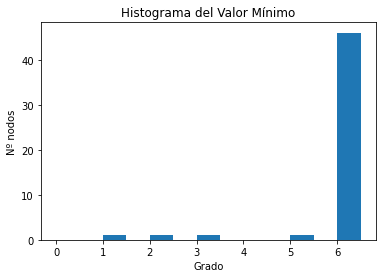

In [151]:
#Histograma del valor mínimo de las 50 redes
step = 0.5
bins = np.arange(0,7, step)
minimo = np.round(vminba2,2);
hist, edges = np.histogram(minimo,bins=bins)
plt.hist(vminba2,bins)
plt.title("Histograma del Valor Mínimo")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()

Distribución de grado de la Red1 Nº  1


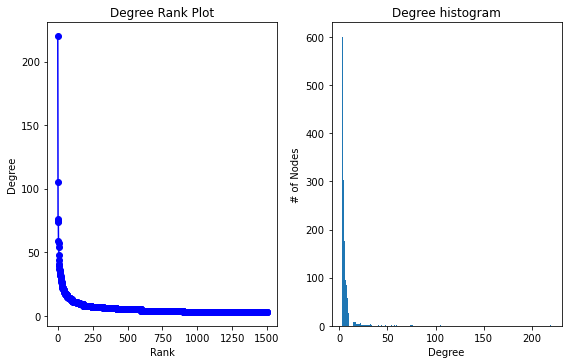

RED 1 
 ---------------------------------------------------------------- 

Número de nodos: 1500.0
Número de aristas: 4491.0
Camino mínimo medio: 1500.0
Grado medio: 5.99
Radio medio de la red 4.0
Diámetro medio de la red 6.0
Número de componentes conexas:  1
Media del coeficiente de clustering 0.02257
Coeficiente de clustering global 0.01276


In [29]:
#Variable aleatoria para pintar la distribución de grado de una de las redes
pintar_dist = random.randint(0,50)
#Modelamos las redes con el modelo Erdos Renyi. Una con 1500 nodos de parámetro y la otra con 445

N1=L1=gradomedio1=caminocorto1=radio1=diametro1=clustering1=clusterglobal1=nrcomponentes=0
#Creamos las variables para guardar la media, desviación típica, el valor máximo y el valor mínimo para cada propiedad
meanba3 = [];
dtba3 = [];
vmaxba3 = [];
vminba3 = []; 
#Variable con el número de nodos deseado para cada red
nodos1=1500
m=3       
for x in range(50):
    red1 = nx.barabasi_albert_graph(nodos1,m)
    
    grados = [val for (node, val) in red1.degree()]
    meanba3.append(np.mean(grados))
    dtba3.append(np.std(grados))
    vmaxba3.append(np.amax(grados))
    vminba3.append(np.amin(grados))
    
    N1 = N1 + red1.number_of_nodes()
    L1 = L1 + red1.number_of_edges()
    gradomedio1 += 2 *  red1.number_of_edges()/ red1.number_of_nodes()
    clustering1 += nx.average_clustering(red1)
    clusterglobal1 += nx.transitivity(red1)
    #Componentes conectados de la red para calcular el camino más corto, diámetro y radio de la red
    conectado1 = nx.connected_components(red1)
    nrcomponentes += nx.number_connected_components(red1)
    maxconectado1 = max(conectado1, key=len) 
    caminocorto1 += len(list(nx.shortest_path(red1.subgraph(maxconectado1))))
    radio1 += nx.radius(red1.subgraph(maxconectado1))
    diametro1 += nx.diameter(red1.subgraph(maxconectado1))
    
    if pintar_dist == x:
            print("Distribución de grado de la Red1 Nº ", x)
            degree_sequence1 = sorted((d for n, d in red1.degree()), reverse=True)
            dmax1 = max(degree_sequence1)

            fig1 = plt.figure("Grado de la red 1", figsize=(8, 8))
            # Create a gridspec for adding subplots of different sizes
            axgrid = fig1.add_gridspec(5, 4)

            ax1 = fig1.add_subplot(axgrid[2:, :2])
            ax1.plot(degree_sequence1, "b-", marker="o")
            ax1.set_title("Degree Rank Plot")
            ax1.set_ylabel("Degree")
            ax1.set_xlabel("Rank")

            ax2 = fig1.add_subplot(axgrid[2:, 2:])
            ax2.bar(*np.unique(degree_sequence1, return_counts=True))
            ax2.set_title("Degree histogram")
            ax2.set_xlabel("Degree")
            ax2.set_ylabel("# of Nodes")

            fig1.tight_layout()
            plt.show()



print('RED 1 \n ---------------------------------------------------------------- \n')
print('Número de nodos:', N1/50)
print('Número de aristas:',round(L1/50,2))
print('Camino mínimo medio:',round(caminocorto1/50,1))
print('Grado medio:',round(gradomedio1/50,2))
print('Radio medio de la red', round(radio1/50,1))
print('Diámetro medio de la red', round(diametro1/50,1))
print('Número de componentes conexas: ', round(nrcomponentes/50))
print('Media del coeficiente de clustering', round(clustering1/50,5))
print('Coeficiente de clustering global', round(clusterglobal1/50,5))


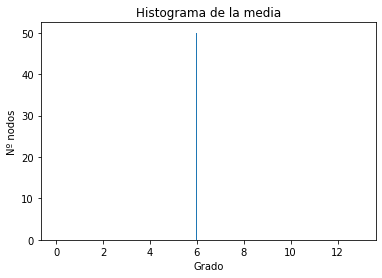

[5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988,
 5.988]

In [154]:
#Histograma de la media de las 50 redes
step = 0.02
bins = np.arange(0,13, step)
media = np.round(meanba3,2);
hist, edges = np.histogram(media,bins=bins)
plt.hist(meanba3,bins)
plt.title("Histograma de la media")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()
meanba3

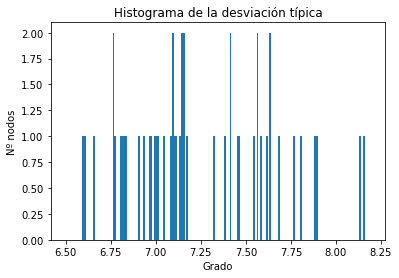

In [159]:
#Histograma de la desviación típica de las 50 redes
step = 0.01
bins = np.arange(6.5,8.2, step)
desviacion = np.round(dtba3,2);
hist, edges = np.histogram(desviacion,bins=bins)
plt.hist(dtba3,bins)
plt.title("Histograma de la desviación típica")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()

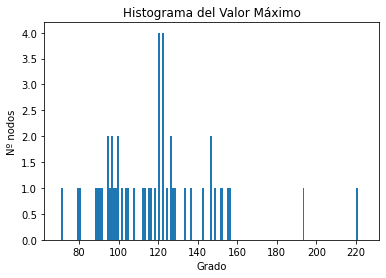

[165,
 180,
 153,
 208,
 165,
 146,
 159,
 178,
 184,
 188,
 172,
 134,
 150,
 145,
 144,
 220,
 169,
 153,
 135,
 137,
 159,
 184,
 163,
 140,
 146,
 155,
 179,
 181,
 150,
 168,
 164,
 161,
 182,
 149,
 158,
 148,
 173,
 189,
 177,
 159,
 164,
 145,
 145,
 142,
 193,
 158,
 202,
 142,
 146,
 136]

In [164]:
#Histograma del valor máximo de las 50 redes
step = 1
bins = np.arange(70,225, step)
maximo = np.round(vmaxba3,2);
hist, edges = np.histogram(maximo,bins=bins)
plt.hist(vmaxba3,bins)
plt.title("Histograma del Valor Máximo")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()
vmaxba1

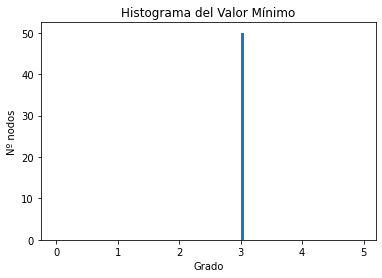

In [167]:
#Histograma del valor mínimo de las 50 redes
step = 0.05
bins = np.arange(0,5, step)
minimo = np.round(vminba3,2);
hist, edges = np.histogram(minimo,bins=bins)
plt.hist(vminba3,bins)
plt.title("Histograma del Valor Mínimo")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()

Distribución de grado de la Red2 Nº  45


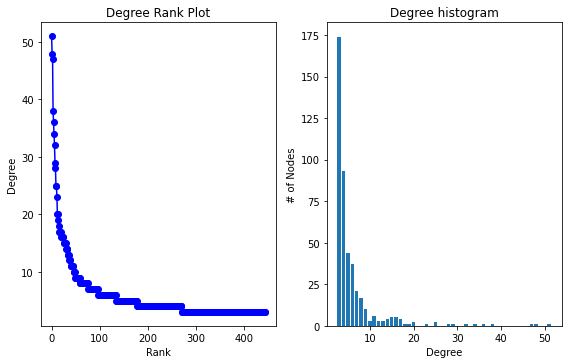

RED 2 
 ---------------------------------------------------------------- 

Número de nodos: 445.0
Número de aristas: 1326.0
Camino mínimo medio: 445.0
Grado medio: 5.96
Radio medio de la red 3.3
Diámetro medio de la red 5.3
Número de componentes conexas:  1
Media del coeficiente de clustering 0.05421
Coeficiente de clustering global 0.03213


In [26]:
#Variable aleatoria para pintar la distribución de grado de una de las redes
pintar_dist = random.randint(0,50)
# Modelamos las redes con el modelo Erdos Renyi. Una con 1500 nodos de parámetro y la otra con 445
N2=L2=gradomedio2=caminocorto2=radio2=diametro2=clustering2=clusterglobal2=nrcomponentes=0
#Creamos las variables para guardar la media, desviación típica, el valor máximo y el valor mínimo para cada propiedad
meanba4 = [];
dtba4 = [];
vmaxba4 = [];
vminba4 = []; 
#Variable con el número de nodos deseado para cada red
nodos2=445
m=3
for x in range(50):
    red2 = nx.barabasi_albert_graph(nodos2,m)
    
    grados = [val for (node, val) in red2.degree()]
    meanba4.append(np.mean(grados))
    dtba4.append(np.std(grados))
    vmaxba4.append(np.amax(grados))
    vminba4.append(np.amin(grados))
    
    N2 = N2 + red2.number_of_nodes()
    L2 = L2 + red2.number_of_edges()
    gradomedio2 += 2 * red2.number_of_edges() / red2.number_of_nodes()
    clustering2 += nx.average_clustering(red2)
    clusterglobal2 += nx.transitivity(red2)
    
    #Componentes conectados de la red para calcular el camino más corto, diámetro y radio de la red
    conectado2 = nx.connected_components(red2)
    nrcomponentes += nx.number_connected_components(red1)
    maxconectado2 = max(conectado2, key=len) 
    caminocorto2 += len(list(nx.shortest_path(red2.subgraph(maxconectado2))))
    radio2 += nx.radius(red2.subgraph(maxconectado2))
    diametro2 += nx.diameter(red2.subgraph(maxconectado2))
    
    if pintar_dist == x:
            print("Distribución de grado de la Red2 Nº ", x)
            degree_sequence2 = sorted((d for n, d in red2.degree()), reverse=True)
            dmax2 = max(degree_sequence2)

            fig2 = plt.figure("Grado de la red 2", figsize=(8, 8))
            # Create a gridspec for adding subplots of different sizes
            axgrid = fig2.add_gridspec(5, 4)

            ax1 = fig2.add_subplot(axgrid[2:, :2])
            ax1.plot(degree_sequence2, "b-", marker="o")
            ax1.set_title("Degree Rank Plot")
            ax1.set_ylabel("Degree")
            ax1.set_xlabel("Rank")

            ax2 = fig2.add_subplot(axgrid[2:, 2:])
            ax2.bar(*np.unique(degree_sequence2, return_counts=True))
            ax2.set_title("Degree histogram")
            ax2.set_xlabel("Degree")
            ax2.set_ylabel("# of Nodes")

            fig2.tight_layout()
            plt.show()

            
print('RED 2 \n ---------------------------------------------------------------- \n')
print('Número de nodos:', N2/50)
print('Número de aristas:',round(L2/50,2))
print('Camino mínimo medio:',round(caminocorto2/50,1))
print('Grado medio:',round(gradomedio2/50,2))
print('Radio medio de la red', round(radio2/50,1))
print('Diámetro medio de la red', round(diametro2/50,1))
print('Número de componentes conexas: ', round(nrcomponentes/50))
print('Media del coeficiente de clustering', round(clustering2/50,5))
print('Coeficiente de clustering global', round(clusterglobal2/50,5))

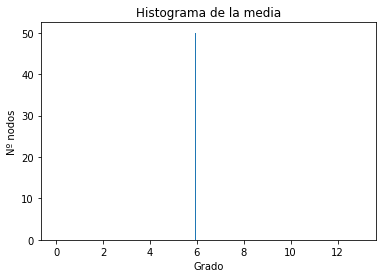

[5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752,
 5.959550561797752]

In [169]:
#Histograma de la media de las 50 redes
step = 0.02
bins = np.arange(0,13, step)
media = np.round(meanba4,2);
hist, edges = np.histogram(media,bins=bins)
plt.hist(meanba4,bins)
plt.title("Histograma de la media")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()
meanba4

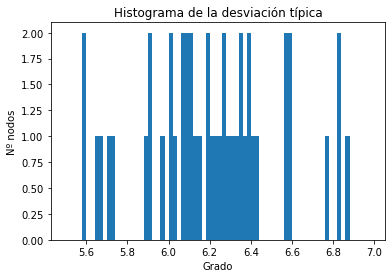

In [173]:
#Histograma de la desviación típica de las 50 redes
step = 0.02
bins = np.arange(5.5,7, step)
desviacion = np.round(dtba4,2);
hist, edges = np.histogram(desviacion,bins=bins)
plt.hist(dtba4,bins)
plt.title("Histograma de la desviación típica")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()

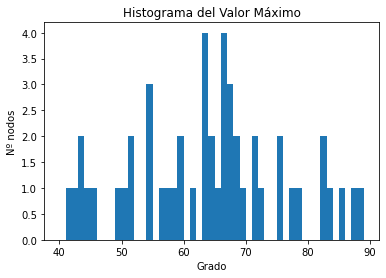

[165,
 180,
 153,
 208,
 165,
 146,
 159,
 178,
 184,
 188,
 172,
 134,
 150,
 145,
 144,
 220,
 169,
 153,
 135,
 137,
 159,
 184,
 163,
 140,
 146,
 155,
 179,
 181,
 150,
 168,
 164,
 161,
 182,
 149,
 158,
 148,
 173,
 189,
 177,
 159,
 164,
 145,
 145,
 142,
 193,
 158,
 202,
 142,
 146,
 136]

In [180]:
#Histograma del valor máximo de las 50 redes
step = 1
bins = np.arange(40,90, step)
maximo = np.round(vmaxba4,2);
hist, edges = np.histogram(maximo,bins=bins)
plt.hist(vmaxba4,bins)
plt.title("Histograma del Valor Máximo")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()
vmaxba1

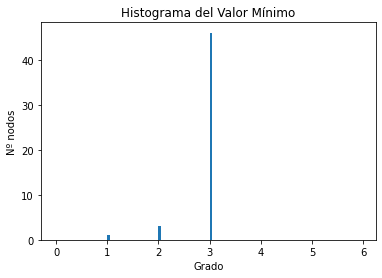

In [182]:
#Histograma del valor mínimo de las 50 redes
step = 0.05
bins = np.arange(0,6, step)
minimo = np.round(vminba4,2);
hist, edges = np.histogram(minimo,bins=bins)
plt.hist(vminba4,bins)
plt.title("Histograma del Valor Mínimo")
plt.ylabel("Nº nodos")
plt.xlabel("Grado")
plt.show()

# Comparación con el Modelo Watts-Strogatz

In [ ]:
# Modelo de red aleatoria de Watts-Strogatz, que es una evolución de Erdos-Renyi
# Tiene como parámetros principales:
#     - El número de nodos, 
#     - Los k vecinos adyacentes más cercanos a los que se conecta, y
#     - La probabilidad p de cambiar un enlace a un vecino por otro nodo cualquiera 
# Cuanto mayor es la probabilidad p más se para favorece el mundo pequeño, a la vez que el conectarse a los
# vecinos favorece el coeficiente de clustering (la existencia de triángulos en el vecindario) 
#
# Más info en: http://snap.stanford.edu/class/cs224w-readings/watts98smallworld.pdf

#Variable aleatoria para pintar la distribución de grado de una de las redes
pintar_dist = random.randint(0,50)

#Creamos las variables para guardar la media, desviación típica, el valor máximo y el valor mínimo para cada propiedad
meanws1 = [];
dtws1 = [];
vmaxws1 = [];
vminws1 = []; 

num_nodos1 = 375
vecinos_adyacentes = 4 # Si es impar coge vecinos-1
probabilidad = 0.2

plt.figure()

for x in range(50):
    red1 = nx.watts_strogatz_graph(num_nodos1, vecinos_adyacentes, probabilidad)
    
    grados = [val for (node, val) in red1.degree()]
    meanws1.append(np.mean(grados))
    dtws1.append(np.std(grados))
    vmaxws1.append(np.amax(grados))
    vminws1.append(np.amin(grados))
    
    N1 = N1 + red1.number_of_nodes()
    L1 = L1 + red1.number_of_edges()
    gradomedio1 += 2 *  red1.number_of_edges()/ red1.number_of_nodes()
    clustering1 += nx.average_clustering(red1)
    clusterglobal1 += nx.transitivity(red1)
    #Componentes conectados de la red para calcular el camino más corto, diámetro y radio de la red
    conectado1 = nx.connected_components(red1)
    nrcomponentes += nx.number_connected_components(red1)
    maxconectado1 = max(conectado1, key=len) 
    caminocorto1 += len(list(nx.shortest_path(red1.subgraph(maxconectado1))))
    radio1 += nx.radius(red1.subgraph(maxconectado1))
    diametro1 += nx.diameter(red1.subgraph(maxconectado1))
    
    if pintar_dist == x:
            print("Distribución de grado de la Red1 Nº ", x)
            degree_sequence1 = sorted((d for n, d in red1.degree()), reverse=True)
            dmax1 = max(degree_sequence1)

            fig1 = plt.figure("Grado de la red 1", figsize=(8, 8))
            # Create a gridspec for adding subplots of different sizes
            axgrid = fig1.add_gridspec(5, 4)

            ax1 = fig1.add_subplot(axgrid[2:, :2])
            ax1.plot(degree_sequence1, "b-", marker="o")
            ax1.set_title("Degree Rank Plot")
            ax1.set_ylabel("Degree")
            ax1.set_xlabel("Rank")

            ax2 = fig1.add_subplot(axgrid[2:, 2:])
            ax2.bar(*np.unique(degree_sequence1, return_counts=True))
            ax2.set_title("Degree histogram")
            ax2.set_xlabel("Degree")
            ax2.set_ylabel("# of Nodes")

            fig1.tight_layout()
            plt.show()
print('RED 1 \n ---------------------------------------------------------------- \n')
print('Número de nodos:', N1/50)
print('Número de aristas:',round(L1/50,2))
print('Camino mínimo medio:',round(caminocorto1/50,1))
print('Grado medio:',round(gradomedio1/50,2))
print('Radio medio de la red', round(radio1/50,1))
print('Diámetro medio de la red', round(diametro1/50,1))
print('Número de componentes conexas: ', round(nrcomponentes/50))
print('Media del coeficiente de clustering', round(clustering1/50,5))
print('Coeficiente de clustering global', round(clusterglobal1/50,5))

In [ ]:
#Variable aleatoria para pintar la distribución de grado de una de las redes
pintar_dist = random.randint(0,50)
# Modelamos las redes con el modelo Erdos Renyi. Una con 1500 nodos de parámetro y la otra con 445
N2=L2=gradomedio2=caminocorto2=radio2=diametro2=clustering2=clusterglobal2=nrcomponentes=0
#Creamos las variables para guardar la media, desviación típica, el valor máximo y el valor mínimo para cada propiedad
meanws2 = [];
dtws2 = [];
vmaxws2 = [];
vminws2 = []; 
#Variable con el número de nodos deseado para cada red

num_nodos1 = 111
vecinos_adyacentes = 4 # Si es impar coge vecinos-1
probabilidad = 0.2
for x in range(50):
    red2 = nx.watts_strogatz_graph(num_nodos1, vecinos_adyacentes, probabilidad)
    
    grados = [val for (node, val) in red2.degree()]
    meanws2.append(np.mean(grados))
    dtws2.append(np.std(grados))
    vmaxws2.append(np.amax(grados))
    vminws2.append(np.amin(grados))
    
    N2 = N2 + red2.number_of_nodes()
    L2 = L2 + red2.number_of_edges()
    gradomedio2 += 2 * red2.number_of_edges() / red2.number_of_nodes()
    clustering2 += nx.average_clustering(red2)
    clusterglobal2 += nx.transitivity(red2)
    
    #Componentes conectados de la red para calcular el camino más corto, diámetro y radio de la red
    conectado2 = nx.connected_components(red2)
    nrcomponentes += nx.number_connected_components(red1)
    maxconectado2 = max(conectado2, key=len) 
    caminocorto2 += len(list(nx.shortest_path(red2.subgraph(maxconectado2))))
    radio2 += nx.radius(red2.subgraph(maxconectado2))
    diametro2 += nx.diameter(red2.subgraph(maxconectado2))
    
    if pintar_dist == x:
            print("Distribución de grado de la Red2 Nº ", x)
            degree_sequence2 = sorted((d for n, d in red2.degree()), reverse=True)
            dmax2 = max(degree_sequence2)

            fig2 = plt.figure("Grado de la red 2", figsize=(8, 8))
            # Create a gridspec for adding subplots of different sizes
            axgrid = fig2.add_gridspec(5, 4)

            ax1 = fig2.add_subplot(axgrid[2:, :2])
            ax1.plot(degree_sequence2, "b-", marker="o")
            ax1.set_title("Degree Rank Plot")
            ax1.set_ylabel("Degree")
            ax1.set_xlabel("Rank")

            ax2 = fig2.add_subplot(axgrid[2:, 2:])
            ax2.bar(*np.unique(degree_sequence2, return_counts=True))
            ax2.set_title("Degree histogram")
            ax2.set_xlabel("Degree")
            ax2.set_ylabel("# of Nodes")

            fig2.tight_layout()
            plt.show()

            
print('RED 2 \n ---------------------------------------------------------------- \n')
print('Número de nodos:', N2/50)
print('Número de aristas:',round(L2/50,2))
print('Camino mínimo medio:',round(caminocorto2/50,1))
print('Grado medio:',round(gradomedio2/50,2))
print('Radio medio de la red', round(radio2/50,1))
print('Diámetro medio de la red', round(diametro2/50,1))
print('Número de componentes conexas: ', round(nrcomponentes/50))
print('Media del coeficiente de clustering', round(clustering2/50,5))
print('Coeficiente de clustering global', round(clusterglobal2/50,5))

In [ ]:
# Modelo de red aleatoria de Watts-Strogatz, que es una evolución de Erdos-Renyi
# Tiene como parámetros principales:
#     - El número de nodos, 
#     - Los k vecinos adyacentes más cercanos a los que se conecta, y
#     - La probabilidad p de cambiar un enlace a un vecino por otro nodo cualquiera 
# Cuanto mayor es la probabilidad p más se para favorece el mundo pequeño, a la vez que el conectarse a los
# vecinos favorece el coeficiente de clustering (la existencia de triángulos en el vecindario) 
#
# Más info en: http://snap.stanford.edu/class/cs224w-readings/watts98smallworld.pdf

#Variable aleatoria para pintar la distribución de grado de una de las redes
pintar_dist = random.randint(0,50)
#Creamos las variables para guardar la media, desviación típica, el valor máximo y el valor mínimo para cada propiedad
meanws3 = [];
dtws3 = [];
vmaxws3 = [];
vminws3 = []; 
num_nodos1 = 750
vecinos_adyacentes = 2 # Si es impar coge vecinos-1
probabilidad = 0.1

plt.figure()

for x in range(50):
    red1 = nx.watts_strogatz_graph(num_nodos1, vecinos_adyacentes, probabilidad)
    
    grados = [val for (node, val) in red1.degree()]
    meanws3.append(np.mean(grados))
    dtws3.append(np.std(grados))
    vmaxws3.append(np.amax(grados))
    vminws3.append(np.amin(grados))
    
    N1 = N1 + red1.number_of_nodes()
    L1 = L1 + red1.number_of_edges()
    gradomedio1 += 2 *  red1.number_of_edges()/ red1.number_of_nodes()
    clustering1 += nx.average_clustering(red1)
    clusterglobal1 += nx.transitivity(red1)
    #Componentes conectados de la red para calcular el camino más corto, diámetro y radio de la red
    conectado1 = nx.connected_components(red1)
    nrcomponentes += nx.number_connected_components(red1)
    maxconectado1 = max(conectado1, key=len) 
    caminocorto1 += len(list(nx.shortest_path(red1.subgraph(maxconectado1))))
    radio1 += nx.radius(red1.subgraph(maxconectado1))
    diametro1 += nx.diameter(red1.subgraph(maxconectado1))
    
    if pintar_dist == x:
            print("Distribución de grado de la Red1 Nº ", x)
            degree_sequence1 = sorted((d for n, d in red1.degree()), reverse=True)
            dmax1 = max(degree_sequence1)

            fig1 = plt.figure("Grado de la red 1", figsize=(8, 8))
            # Create a gridspec for adding subplots of different sizes
            axgrid = fig1.add_gridspec(5, 4)

            ax1 = fig1.add_subplot(axgrid[2:, :2])
            ax1.plot(degree_sequence1, "b-", marker="o")
            ax1.set_title("Degree Rank Plot")
            ax1.set_ylabel("Degree")
            ax1.set_xlabel("Rank")

            ax2 = fig1.add_subplot(axgrid[2:, 2:])
            ax2.bar(*np.unique(degree_sequence1, return_counts=True))
            ax2.set_title("Degree histogram")
            ax2.set_xlabel("Degree")
            ax2.set_ylabel("# of Nodes")

            fig1.tight_layout()
            plt.show()
print('RED 1 \n ---------------------------------------------------------------- \n')
print('Número de nodos:', N1/50)
print('Número de aristas:',round(L1/50,2))
print('Camino mínimo medio:',round(caminocorto1/50,1))
print('Grado medio:',round(gradomedio1/50,2))
print('Radio medio de la red', round(radio1/50,1))
print('Diámetro medio de la red', round(diametro1/50,1))
print('Número de componentes conexas: ', round(componentes/50))
print('Media del coeficiente de clustering', round(clustering1/50,5))
print('Coeficiente de clustering global', round(clusterglobal1/50,5))

In [ ]:
#Variable aleatoria para pintar la distribución de grado de una de las redes
pintar_dist = random.randint(0,50)
# Modelamos las redes con el modelo Erdos Renyi. Una con 1500 nodos de parámetro y la otra con 445
N2=L2=gradomedio2=caminocorto2=radio2=diametro2=clustering2=clusterglobal2=nrcomponentes=0
#Creamos las variables para guardar la media, desviación típica, el valor máximo y el valor mínimo para cada propiedad
meanws4 = [];
dtws4 = [];
vmaxws4 = [];
vminws4 = []; 
#Variable con el número de nodos deseado para cada red

num_nodos1 = 222
vecinos_adyacentes = 2 # Si es impar coge vecinos-1
probabilidad = 0.1
for x in range(50):
    red2 = nx.watts_strogatz_graph(num_nodos1, vecinos_adyacentes, probabilidad)
    
    grados = [val for (node, val) in red2.degree()]
    meanws4.append(np.mean(grados))
    dtws4.append(np.std(grados))
    vmaxws4.append(np.amax(grados))
    vminws4.append(np.amin(grados))
    
    N2 = N2 + red2.number_of_nodes()
    L2 = L2 + red2.number_of_edges()
    gradomedio2 += 2 * red2.number_of_edges() / red2.number_of_nodes()
    clustering2 += nx.average_clustering(red2)
    clusterglobal2 += nx.transitivity(red2)
    
    #Componentes conectados de la red para calcular el camino más corto, diámetro y radio de la red
    conectado2 = nx.connected_components(red2)
    nrcomponentes += nx.number_connected_components(red1)
    maxconectado2 = max(conectado2, key=len) 
    caminocorto2 += len(list(nx.shortest_path(red2.subgraph(maxconectado2))))
    radio2 += nx.radius(red2.subgraph(maxconectado2))
    diametro2 += nx.diameter(red2.subgraph(maxconectado2))
    
    if pintar_dist == x:
            print("Distribución de grado de la Red2 Nº ", x)
            degree_sequence2 = sorted((d for n, d in red2.degree()), reverse=True)
            dmax2 = max(degree_sequence2)

            fig2 = plt.figure("Grado de la red 2", figsize=(8, 8))
            # Create a gridspec for adding subplots of different sizes
            axgrid = fig2.add_gridspec(5, 4)

            ax1 = fig2.add_subplot(axgrid[2:, :2])
            ax1.plot(degree_sequence2, "b-", marker="o")
            ax1.set_title("Degree Rank Plot")
            ax1.set_ylabel("Degree")
            ax1.set_xlabel("Rank")

            ax2 = fig2.add_subplot(axgrid[2:, 2:])
            ax2.bar(*np.unique(degree_sequence2, return_counts=True))
            ax2.set_title("Degree histogram")
            ax2.set_xlabel("Degree")
            ax2.set_ylabel("# of Nodes")

            fig2.tight_layout()
            plt.show()

            
print('RED 2 \n ---------------------------------------------------------------- \n')
print('Número de nodos:', N2/50)
print('Número de aristas:',round(L2/50,2))
print('Camino mínimo medio:',round(caminocorto2/50,1))
print('Grado medio:',round(gradomedio2/50,2))
print('Radio medio de la red', round(radio2/50,1))
print('Diámetro medio de la red', round(diametro2/50,1))
print('Número de componentes conexas: ', round(nrcomponentes/50))
print('Media del coeficiente de clustering', round(clustering2/50,5))
print('Coeficiente de clustering global', round(clusterglobal2/50,5))